In [1]:
import sklearn as sk
import pandas as pd

In [2]:
# Option 1 ##: 
#Read data by uploading a file
from google.colab import files
uploaded = files.upload()

Saving stories1.csv to stories1.csv
Saving augmented_with_backtrans.csv to augmented_with_backtrans.csv
Saving Obrist2014_Smell_5_1.csv to Obrist2014_Smell_5_1.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
# If you read your data by files uploading (above cell)
import io
df = pd.read_csv(io.BytesIO(uploaded['Obrist2014_Smell_5_1.csv']))
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df[['T_TitleOfExp', 'T_Trigger']]
print(df.head())


# Read augmented db
df_aug = pd.read_csv('/content/augmented_with_backtrans.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_aug.head()

              T_TitleOfExp                                          T_Trigger
0   It Wasn't Gas I Passed  The smell was in comparison to rotten eggs and...
1      The Foul Litter box  Whenever I walked into my brother's apartment ...
2        I Can't Smell You  I, just tonight, had a coworker fart in my off...
3    Dragon Breath Teacher  Once a teacher yelled at me during class. She ...
4  The day I took a plunge  I was playing in a field with my friends when ...


text categoryNumber
0  It Wasn't Gas I Passed. The smell was in compa...           cat8
1  It Wasn't Gas I Passed. was in comparison rott...           cat8
2  information technology Wasn't vaunt single Pas...           cat8
3  information technology has not been passed. wa...           cat8
4  The Foul Litter box. Whenever I walked into my...           cat8

In [136]:
## Option 2 ##: 
# Reading data by uploading file to your drive and mount the drive from colab
# Before running this cell, upload the obrist data into the drive file. 
# You can open up the File directory from the left.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!ls


augmented_with_backtrans.csv  glove.6B.300d.txt		sample_data
drive			      glove.6B.50d.txt		stories1.csv
glove.6B.100d.txt	      glove.6B.zip
glove.6B.200d.txt	      Obrist2014_Smell_5_1.csv


In [137]:
df = pd.read_csv('./Obrist2014_Smell_5_1.csv')
df = df[['T_TitleOfExp', 'T_Trigger']]
df.columns = ['title', 'trigger']
df.head(2)

title                                            trigger
0  It Wasn't Gas I Passed  The smell was in comparison to rotten eggs and...
1     The Foul Litter box  Whenever I walked into my brother's apartment ...

###Combining title and stories 

In [138]:
# Create an empty df for better computation speed
indices = [x for x in range(len(df))]
df_text = pd.DataFrame(columns=['text'], index=indices)

In [139]:
# Now doing row-wise combinination of title and text
for index, row in df.iterrows():
    df_text.iloc[index]['text'] = (row.title).strip() + ". " + (row.trigger).strip()

In [140]:
df = df_text
del df_text
df

text
0    It Wasn't Gas I Passed. The smell was in compa...
1    The Foul Litter box. Whenever I walked into my...
2    I Can't Smell You. I, just tonight, had a cowo...
3    Dragon Breath Teacher. Once a teacher yelled a...
4    The day I took a plunge. I was playing in a fi...
5    Eau d'Homeless (aka Why I Should Carry Febreze...
6    Stinky Pits. My daughter came into my room and...
7    too much. I put on too much cologne when I was...
8    People. I attended a seminar in which I had to...
9    Accidental compliments. I washed my clothes wi...
10   Positive licorice scent. I found out I like li...
11   Meat Fail. I walked into a meatshop, and the s...
12   B&C Incense. This was the last day of filming ...
13   The thousand dollar smell.. A few years ago we...
14   The Overwhelming Odor of Hops. I was pregnant ...
15   Pungent Supermarket Smell. I guess one of the ...
16   Cat Crap... Ohhh that smell!!!. I have three c...
17   Saved by the Smell!. Among many things in my s...
18   Accidental vegetarian. I was pregnant, so I wa...
19   Pregnancy. When I was pregnant anything that s...
20   Smell of death. I remember the smell of a nurs...
21   The Aroma that Recollects an Antecedent Amigo ...
22   Bread in the oven. The first time I ever made ...
23   Chipotle. The most memorable smell experience ...
24   Smells of subway. One day i decided to go to s...
25   Comforting sweater scent. My old grirfriend us...
26   White Lilac Sheets. My brother arrived at my h...
27   The Road to Sous Chef. I remember the first da...
28   bakery. The first time I walked into a bakery,...
29   Beginning of winter coffee.. I absolutely love...
30   Homemade Bread. Coming home from a bad day at ...
31   Thanksgiving smells of childhood. I am one of ...
32   Get Home to a Wonderful Meal. I was having a r...
33   Laughing with Cookies. I remember walking into...
34   Airplane Odor. I hate to travel and one thing ...
35   ER Odors and Funk. Entering an emergency room ...
36   Frosting Donuts. The smell of a donut shop, or...
37   The smell of an Ex. My scent memory has to do ...
38   Redbull. Everytime I smell red bull I think of...
39   No curry for you!. The smell of rotting Indian...
40   Gramma. When my gramma was dying she had sores...
41   Dead Body. The first time that I smelled a dec...
42   The End of his life , beginning of flowers.. T...
43   Everyday Scents. the smell I am thinking of is...
44   My Grandpa's Money Machine. When I was extreme...
45   moms cookies. I like of the smell of moms cook...
46   grandfather. My grandfather smoked a pipe. Sme...
47   Dramatic Smells. I remember walking onto a hos...
48   Sauerkraut and mothballs. I remember when I wa...
49   My trip to the zoo. Going to the zoo as a chil...
50   Mamaw's Closet. I went into my grandmother's c...
51   Bay Air. Driving down the shore to Wildwood, N...
52   Smells Like Mamaw's House. Everytime we would ...
53   The smell of Christmas. The smell of cinnamon ...
54   Peppery Shame. I remember the peppery smell of...
55   Car Crash. When I was 16 I crashed my car into...
56   First Time At The Nursing Home. My mom was tra...
57   Mommy Dearest's Perfume Makes Vomit Bloom. My ...
58   Smellerific. I drank (nearly) an entire 750ml ...
59   pine tree. When I was a kid, I was sledding in...
60   smell of new house. I remember when I was 8 ye...
61   The Smell of My Past. I once dated a guy that ...
62   The Essence of  Surgery. One particular memora...
63   Death and it's presence. The smell that most s...
64   When my mother died. I remember when I went to...
65   My Moms Purse. The most memorable smell is the...
66   The best part of waking up. When I was young a...
67   The Smell of Coffee in the Morning. The smell ...
68   Schools Out. Every spring, The smell of a sunn...
69   Funnel Cakes of Joy. My childhood wasn't the g...
70   First ejaculation. When I was twelve, I had my...
71   Boyfriend's cologne; bringing back memories fr...
72   Changing Alex. The first time 

In [141]:
df['original'] = df['text']

print(df.iloc[0]['text'])


It Wasn't Gas I Passed. The smell was in comparison to rotten eggs and the reason it is so memorable is because the source of the smell was coming from my mouth. I was in a small room full of people who assumed someone had released gas and was too embarrassed to fess up to the real source. Needless to say I called my mom to come and get me, and left as quickly as I could. I am sure they figured out the source once I was gone and it no longer smelled like that there.


###Remove punctuation

In [142]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['text']=df['text'].map(lambda x: remove_punctuation(x))
print(df.head())


df_aug['text']=df_aug['text'].map(lambda x: remove_punctuation(x))
df_aug.head()

                                                text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  


text categoryNumber
0  It Wasnt Gas I Passed The smell was in compari...           cat8
1  It Wasnt Gas I Passed was in comparison rotten...           cat8
2  information technology Wasnt vaunt single Pass...           cat8
3  information technology has not been passed was...           cat8
4  The Foul Litter box Whenever I walked into my ...           cat8

In [144]:
!pip install unidecode
print(df.head(10))
print(df_aug.head())
import unidecode
def remove_accents(text):
  #print(text)
  #unaccented_string = unidecode.unidecode(text)
  #return unaccented_string
  no_punct=[unidecode.unidecode(words) for words in text]
  words_wo_punct=''.join(no_punct)
  return words_wo_punct

df_aug['text']=df_aug['text'].map(lambda x: remove_accents(x))
df_aug.head()

df['text']=df['text'].map(lambda x: remove_accents(x))
df.head(10)







                                                text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   
5  Eau dHomeless aka Why I Should Carry Febreze A...   
6  Stinky Pits My daughter came into my room and ...   
7  too much I put on too much cologne when I was ...   
8  People I attended a seminar in which I had to ...   
9  Accidental compliments I washed my clothes wit...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  
5  Eau d'Homeless (aka Why I Should Carry Febreze... 

text  \
0  It Wasnt Gas I Passed The smell was in compari...   
1  The Foul Litter box Whenever I walked into my ...   
2  I Cant Smell You I just tonight had a coworker...   
3  Dragon Breath Teacher Once a teacher yelled at...   
4  The day I took a plunge I was playing in a fie...   
5  Eau dHomeless aka Why I Should Carry Febreze A...   
6  Stinky Pits My daughter came into my room and ...   
7  too much I put on too much cologne when I was ...   
8  People I attended a seminar in which I had to ...   
9  Accidental compliments I washed my clothes wit...   

                                            original  
0  It Wasn't Gas I Passed. The smell was in compa...  
1  The Foul Litter box. Whenever I walked into my...  
2  I Can't Smell You. I, just tonight, had a cowo...  
3  Dragon Breath Teacher. Once a teacher yelled a...  
4  The day I took a plunge. I was playing in a fi...  
5  Eau d'Homeless (aka Why I Should Carry Febreze...  
6  Stinky Pits. My daughter came into my room and...  
7  too much. I put on too much cologne when I was...  
8  People. I attended a seminar in which I had to...  
9  Accidental compliments. I washed my clothes wi...

###Tokenization - Tokenizing is the process of splitting strings into a list of words. Here, “\W+” splits on one or more non-word character

In [145]:
import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split
df['text']=df['text'].map(lambda x: tokenize(str(x)))
df.head()

df_aug['text']=df_aug['text'].map(lambda x: tokenize(str(x)))
df_aug.head()

text categoryNumber
0  [It, Wasnt, Gas, I, Passed, The, smell, was, i...           cat8
1  [It, Wasnt, Gas, I, Passed, was, in, compariso...           cat8
2  [information, technology, Wasnt, vaunt, single...           cat8
3  [information, technology, has, not, been, pass...           cat8
4  [The, Foul, Litter, box, Whenever, I, walked, ...           cat8

###Remove stop word - Stop words are irrelevant words that won’t help

In [146]:
import nltk 
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])
def remove_stopwords(text):
    #Lowercased it 
    #filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    text = [word.lower() for word in text]
    text=[word for word in text if len(word) > 2 if not word in stopword]
    return text
df['text'] = df['text'].map(lambda x: remove_stopwords(x))
df.head()

df_aug['text']=df_aug['text'].map(lambda x: remove_stopwords(x))
df_aug.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


text categoryNumber
0  [wasnt, gas, passed, smell, comparison, rotten...           cat8
1  [wasnt, gas, passed, comparison, rotten, eggs,...           cat8
2  [information, technology, wasnt, vaunt, single...           cat8
3  [information, technology, passed, comparable, ...           cat8
4  [foul, litter, box, whenever, walked, brothers...           cat8

In [147]:
#join all sentence into one string
def joinSentence(sentence):
    return " ".join(sentence)



sentences = df_aug['text'].apply(lambda s:joinSentence(s))
corpus = " ".join(sentences)
corpus = corpus.split()
print(corpus)





['wasnt', 'gas', 'passed', 'smell', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'source', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'get', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'gone', 'longer', 'smelled', 'like', 'wasnt', 'gas', 'passed', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'longer', 'smelled', 'like', 'information', 'technology', 'wasnt', 'vaunt', 'single', 'passed', 'comparability', 'crappy', 'testis', 'cause', 'memorable', 'flavour', 'orgasm', 'mouth', 'lowly', 'board', 'broad', 'citizenry', 'arrogate', 'mortal', 'bring', 'gaseous', 'state', 'humil

###Stemming is the process of reducing a word to its root form.

In [148]:
#stemming using porter stemmer -> reduces words to their base words

nltk.download('wordnet')
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

def stem(text):
    text=[p_stemmer.stem(word) for word in text]
    return text

df['text_processed'] = df['text'].map(lambda x: stem(x))

#df.to_csv('cleaned_stories.csv') 
#files.download('cleaned_stories.csv')
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  
0  [wasnt, ga, pass, smell, comparison, rotten, e...  
1  [foul, litter, box, whenev, walk, brother, apa...  
2  [cant, smell, tonight, cowork, fart, offic, le...  
3  [dragon, breath, teacher, teacher, yell, class...  
4  [day, took, plung, play, field, friend, trip, ...

Lemmatising



In [149]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma(text):
  lemma_words=[lemmatizer.lemmatize(w) for w in text]
  return lemma_words

df['text_processed'] = df['text_processed'].map(lambda x: lemma(x))
df.head()

text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  
0  [wasnt, ga, pas, smell, comparison, rotten, eg...  
1  [foul, litter, box, whenev, walk, brother, apa...  
2  [cant, smell, tonight, cowork, fart, offic, le...  
3  [dragon, breath, teacher, teacher, yell, class...  
4  [day, took, plung, play, field, friend, trip, ...

###Pos tagging 

In [150]:
# required for tokenization
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [151]:
from nltk import word_tokenize, pos_tag

def positionOfTagSentence(sentence):
    sentence = " ".join(sentence)
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

In [152]:
df['text_POS'] = df['text'].apply(lambda s:positionOfTagSentence(s))
df.head()


text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  \
0  [wasnt, ga, pas, smell, comparison, rotten, eg...   
1  [foul, litter, box, whenev, walk, brother, apa...   
2  [cant, smell, tonight, cowork, fart, offic, le...   
3  [dragon, breath, teacher, teacher, yell, class...   
4  [day, took, plung, play, field, friend, trip, ...   

                                            text_POS  
0  [(wasnt, NN), (gas, NN), (passed, VBD), (smell...  
1  [(foul, NN), (litter, NN), (box, NN), (wheneve...  
2  [(cant, NN), (smell, NN), (tonight, NN), (cowo...  
3  [(dragon, NN), (breath, NN), (teacher, NN), (t...  
4  [(day, NN), (took, VBD), (plunge, NN), (playin...

Skip Gram Model

In [153]:
from keras.preprocessing import text

In [154]:
tokenizer = text.Tokenizer()
print(corpus)

tokenizer.fit_on_texts(corpus)


word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id) + 1 

print(vocab_size)

embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:100])


['wasnt', 'gas', 'passed', 'smell', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'source', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'get', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'gone', 'longer', 'smelled', 'like', 'wasnt', 'gas', 'passed', 'comparison', 'rotten', 'eggs', 'reason', 'memorable', 'smell', 'coming', 'mouth', 'small', 'room', 'full', 'people', 'assumed', 'someone', 'released', 'gas', 'embarrassed', 'fess', 'real', 'source', 'needless', 'say', 'called', 'mom', 'come', 'left', 'quickly', 'could', 'sure', 'figured', 'source', 'longer', 'smelled', 'like', 'information', 'technology', 'wasnt', 'vaunt', 'single', 'passed', 'comparability', 'crappy', 'testis', 'cause', 'memorable', 'flavour', 'orgasm', 'mouth', 'lowly', 'board', 'broad', 'citizenry', 'arrogate', 'mortal', 'bring', 'gaseous', 'state', 'humil

# Word Vecotorisation -skip gram
  

In [155]:
from keras.preprocessing.sequence import skipgrams
print(id2word)
# generate skip-grams
print(wids)
skip_grams = [skipgrams(wids, vocabulary_size=vocab_size, window_size=4) ]


#pairs, labels = skipgrams(wids, len(word2id),window_size=10)

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for pair in skip_grams[0][0]:
   pair[0] = pair[0][0]
   if isinstance(pair[1], list):
     pair[1] = pair[1][0]
  
  
#   #print(pair)

for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

{1: 'smell', 2: 'time', 3: 'one', 4: 'day', 5: 'iodine', 6: 'first', 7: 'would', 8: 'scent', 9: 'like', 10: 'smelled', 11: 'number', 12: 'house', 13: 'atomic', 14: 'back', 15: 'remember', 16: 'could', 17: 'new', 18: 'get', 19: 'information', 20: 'technology', 21: 'sense', 22: 'smells', 23: 'home', 24: 'ace', 25: 'every', 26: 'memorable', 27: 'unity', 28: 'experience', 29: 'something', 30: 'really', 31: 'single', 32: 'always', 33: 'car', 34: 'perfume', 35: 'take', 36: 'made', 37: 'air', 38: 'feel', 39: 'think', 40: 'feeling', 41: 'olfactory', 42: 'good', 43: 'years', 44: 'ever', 45: 'room', 46: 'used', 47: 'even', 48: 'didnt', 49: 'ane', 50: 'family', 51: 'still', 52: 'fresh', 53: 'food', 54: 'smelling', 55: 'away', 56: 'odor', 57: 'iodin', 58: 'make', 59: 'work', 60: 'memories', 61: 'coffee', 62: 'memory', 63: 'place', 64: 'way', 65: 'sweet', 66: 'old', 67: 'pizza', 68: 'life', 69: 'love', 70: 'walking', 71: 'school', 72: 'never', 73: 'much', 74: 'walk', 75: 'aroma', 76: 'walked', 77: 

# Import Word Embeddings

In [ ]:
#https://keras.io/examples/nlp/pretrained_word_embeddings/
#https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/

In [27]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2021-03-11 22:57:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-11 22:57:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-11 22:57:08--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [156]:
import os
import numpy as np


path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

# f = open('../input/glove6b/glove.6B.300d.txt')

# embeddings_index = {}
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [157]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_4_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_5_input (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 100)       935800      embedding_4_input[0][0]          
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 100)       935800      embedding_5_input[0][0]          
____________________________________________________________________________________________

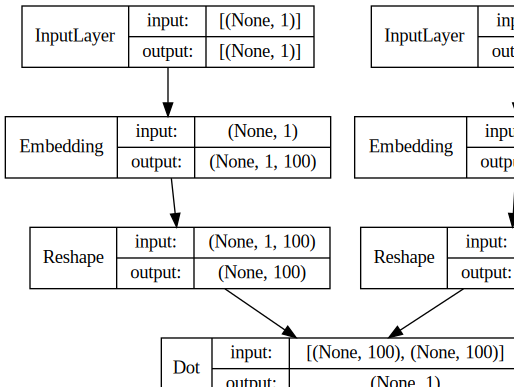

In [158]:
 
from keras.layers import dot
from keras.models import Model
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
 
# build skip-gram architecture
word_model = Sequential()
#model.add(Embedding(size_of_vocabulary,300,weights=[embedding_matrix],input_length=100,trainable=False)) 
word_model.add(Embedding(vocab_size, embed_size,weights=[embedding_matrix],input_length=1,trainable=False))
                         


# word_model.add(Embedding(vocab_size, embed_size,
#                          embeddings_initializer="glorot_uniform",
#                          input_length=1))
word_model.add(Reshape((embed_size, )))
 
context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,weights=[embedding_matrix],input_length=1,trainable=False))
# context_model.add(Embedding(vocab_size, embed_size,
#                   embeddings_initializer="glorot_uniform",
#                   input_length=1))
context_model.add(Reshape((embed_size,)))
 
 
dot_product = dot([word_model.output, context_model.output], axes=1,
                  normalize=False) 
dot_product = Dense(1, kernel_initializer="glorot_uniform", 
              activation="sigmoid")(dot_product) 
model = Model(inputs=[word_model.input, context_model.input], 
              outputs=dot_product) 
model.compile(loss="mean_squared_error", optimizer="rmsprop") 
 
#model = Sequential()
#model.add(Merge([word_model, context_model], mode="dot"))
#model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
#model.compile(loss="mean_squared_error", optimizer="rmsprop")
 
# view model summary
print(model.summary())
 
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
 
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [159]:
import numpy as np
for epoch in range(1, 50):
  loss = 0
  for i, elem in enumerate(skip_grams):
    pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    #print(pair_first_elem)
    pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [pair_first_elem, pair_second_elem]
    Y = labels
    if i % 10000 == 0:
      print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
    loss += model.train_on_batch(X,Y)  

  print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 0.5176020264625549
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 0.5174967646598816
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 0.5174204111099243
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 0.5173560380935669
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 0.5172989964485168
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 6 Loss: 0.5172466039657593
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 7 Loss: 0.5171975493431091
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 8 Loss: 0.5171511173248291
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 9 Loss: 0.5171064734458923
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 10 Loss: 0.5170636177062988
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 11 Loss: 0.5170217752456665
Processed 0 (skip_f

In [160]:
merge_layer = model.layers[0]
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values())

(9357, 100)


In [161]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['smell', 'remember', 'scent', 'gas', 'experience', 'aroma', 'grandma', 'fart', 'deodorant']}

similar_words

(9357, 9357)


{'aroma': ['pungent', 'flavor', 'aromas', 'flavour', 'sweetness'],
 'deodorant': ['shampoo', 'deodorants', 'shampoos', 'cleanser', 'lotion'],
 'experience': ['experiences', 'sort', 'kind', 'mind', 'learning'],
 'fart': ['briquette', 'bakehouse', 'mouldy', 'acetum', 'farted'],
 'gas': ['fuel', 'electricity', 'oil', 'coal', 'pipeline'],
 'grandma': ['grandpa', 'mom', 'aunt', 'grandmother', 'dad'],
 'remember': ['forget', 'imagine', 'maybe', 'tell', 'wonder'],
 'scent': ['scents', 'fragrance', 'pungent', 'odor', 'smell'],
 'smell': ['odor', 'smells', 'smelling', 'stench', 'smelled']}

Total words: 54 	Word Embedding shapes: (54, 100)


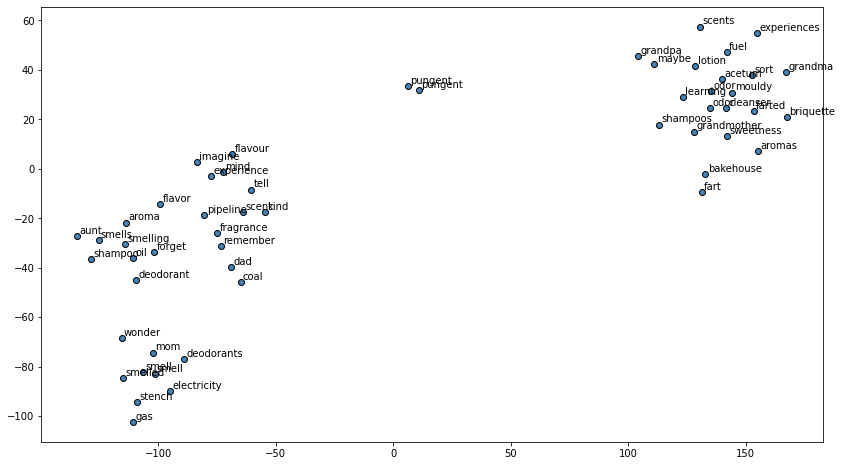

In [162]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:

#https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html

# Adding Vectors

In [163]:
df_weighting = pd.DataFrame(weights, id2word.values())
df_weighting.head()
word = "wasnt"
#print(df_weighting.loc[[word],:].to_string(index=False))
#print(df_weighting.loc[["fiancé"],:].to_string(index=False))




```
# This is formatted as code
```
[link text](https://)


In [164]:
# def addBoth(v1, v2):


# res = np.array([0.0 for i in range(0,100)])


# for i in range(len(v1)):
#   res[i] = v1[i] + v2[i]
# print(res)

bigDictionary = {}

def addWordVectors(s):
  print(s.index[0])
  #print(s['text'])
  
  stories = s['text_split']
  print(stories)
  first = True
  count = 0 
  for x in stories:
    for i in x:
      
      count+=1
      if first:
        ans = df_weighting.loc[i]
        first=False
      else:
        ans = ans.add(df_weighting.loc[i])
      #print(i)
  #print(stories[0])
  #print(stories[0])
  #print(len)
  #print(df_weighting.loc[stories[0]])
  #for x in range(1, len(stories)):
    #ans = ans.add(df_weighting.loc[stories[x]])
  #story = s['original']
  bigDictionary[s.index[0]] = ans * float(1/count);
  #print(ans)
  
print(df.head())



                                                text  \
0  [wasnt, gas, passed, smell, comparison, rotten...   
1  [foul, litter, box, whenever, walked, brothers...   
2  [cant, smell, tonight, coworker, fart, office,...   
3  [dragon, breath, teacher, teacher, yelled, cla...   
4  [day, took, plunge, playing, field, friends, t...   

                                            original  \
0  It Wasn't Gas I Passed. The smell was in compa...   
1  The Foul Litter box. Whenever I walked into my...   
2  I Can't Smell You. I, just tonight, had a cowo...   
3  Dragon Breath Teacher. Once a teacher yelled a...   
4  The day I took a plunge. I was playing in a fi...   

                                      text_processed  \
0  [wasnt, ga, pas, smell, comparison, rotten, eg...   
1  [foul, litter, box, whenev, walk, brother, apa...   
2  [cant, smell, tonight, cowork, fart, offic, le...   
3  [dragon, breath, teacher, teacher, yell, class...   
4  [day, took, plung, play, field, friend, tri

In [165]:
df_new = pd.read_csv('/content/stories1.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_new.head()
#print(len(df_new))
#df_new['text'] = df_new['col']
df_new.head()

print(str(df_new.loc[4]))
story = str(df_new.loc[5])
print(story)
print(story.split())
#df_new
df_new['text_split']=df_new['col'].map(lambda x: remove_accents(x))
df_new['text_split'] = df_new['text_split'].apply(lambda s:s.split())


df_new

col    bush pile smell pungent smeared embarrassed sm...
Name: 4, dtype: object
col    dhomeless ordinary typical live urban fair rag...
Name: 5, dtype: object
['col', 'dhomeless', 'ordinary', 'typical', 'live', 'urban', 'fair', 'rag...', 'Name:', '5,', 'dtype:', 'object']


col  \
0    smell rotten eggs memorable smell mouth small ...   
1    foul litter smell hit entire smell urine lesse...   
2    smell coworker fart didnt quiet nauseated cool...   
3     dragon yelled close smell bad much worse focused   
4    bush pile smell pungent smeared embarrassed sm...   
5    dhomeless ordinary typical live urban fair rag...   
6                      stinky next deodorant stunk bad   
7                much much cologne strong long noticed   
8     seminar different smell asia several puke behave   
9    accidental washed tide sport strong much much ...   
10   positive licorice licorice deodorant liked sme...   
11   meatshop smell pungent sick overbearing vegeta...   
12   last large sound green video smell incense mus...   
13   smell spouse liked local fresh blacktop affect...   
14   overwhelming hops pregnant restaurant brews ov...   
15   pungent smell memorable recall smell fiesta bo...   
16   cat ohhh smell litter unpleasant bag cat litte...   
17   smell many sexualpersonal smell smell importan...   
18   accidental vegetarian pregnant sensitive parti...   
19   pregnant raw sick touch handle sick smell pert...   
20   smell smell stale negative smell smell smell d...   
21   aroma recollects antecedent amigo memories sce...   
22   oven first bread unemployed try present save f...   
23   chipotle memorable smell chipotle first smell ...   
24   subway subway first first subway favorite rest...   
25   comforting sweater old wash tide detergent par...   
26   white guest master king earlier uhaul old love...   
27   sous chef first kitchen distinguishable able s...   
28        first wanted smell amazing single stop smell   
29   smell black friday exhausted angry dark middle...   
30   homemade bad house smell bread wasnt uncommon ...   
31   thanksgiving front house nice last thanksgivin...   
32   wonderful long hungry hungry cranky wonderful ...   
33   kitchen bowl pan smell happy draw kitchen spen...   
34   smell stuffy stale smell old smell stale worst...   
35   funk intense smell alcohol smell mop mopped si...   
36   smell donut general memories bakery old awful ...   
37   smell scent cologne worn associate specific sc...   
38   redbull smell red bull red cant red bull bad s...   
39   curry smell indian indian club cooked curry ho...   
40   gramma gramma bad smell flesh come flesh unabl...   
41   dead first memorable human corpse depressing h...   
42   end smell sad smell strong smell close much sm...   
43   everyday smell dad deoderant wouldnt able comm...   
44   grandpas young grandpa upstairs personal grand...   
45                                   smell whole house   
46                                                pipe   
47   dramatic hospital surgery smell smell reminds ...   
48   sauerkraut walked house smell sauerkraut house...   
49        zoo zoo zoo definite smell zoo smell excited   
50   mamaws toys stacks smelled little musty comfor...   
51   bay wildwood best certain smell stuck stayed b...   
52   mamaws house house mississippi particular smel...   
53   smell christmas smell cinnamon reminds christm...   
54   peppery peppery smell spray strong wasnt negat...   
55   radio easiest recall smell airbag wasnt less d...   
56   first live sick visit smell different smell sm...   
57   mommy bloom particular heavy flower horrendous...   
58   smellerific drank entire 750ml bottle southern...   
59   pine backyard hit hard large pine collarbone s...   
60   smell new house old new house distraught house...   
61   smell dated guy specific cologne brokeup bad b...   
62   particular memorable smell cleaner clean gurne...   
63   presence smell stands hospital medicinal smell...   
64                    hospital clean antiseptic strong   
65   memorable smell smell smell right smell imposs...   
66           best young smell happy smell coffee cabin   
67                      smell smell read smell reminds   
68   smell sunny clear cool reminds end little ki

In [166]:
# def positionOfTagSentence(sentence):
#   sum = []
#   for x in sentence:



#     sentence = " ".join(sentence)
#     tokens = word_tokenize(sentence)
#     return pos_tag(tokens)
count = 0
#df.loc[[s],['text','original']].apply(lambda s: addWordVectors(s))
#print(len(df))
for x in range(0, len(df_new)):
  #print(df_new.loc[x])
  addWordVectors(df_new.loc[[x], ['text_split']])#.loc[[x],['col', 'text'] ])
#df['text'].apply(lambda s:addWordVectors(s))
df_new.head()
#print(bigDictionary)
  

0
0    [smell, rotten, eggs, memorable, smell, mouth,...
Name: text_split, dtype: object
1
1    [foul, litter, smell, hit, entire, smell, urin...
Name: text_split, dtype: object
2
2    [smell, coworker, fart, didnt, quiet, nauseate...
Name: text_split, dtype: object
3
3    [dragon, yelled, close, smell, bad, much, wors...
Name: text_split, dtype: object
4
4    [bush, pile, smell, pungent, smeared, embarras...
Name: text_split, dtype: object
5
5    [dhomeless, ordinary, typical, live, urban, fa...
Name: text_split, dtype: object
6
6    [stinky, next, deodorant, stunk, bad]
Name: text_split, dtype: object
7
7    [much, much, cologne, strong, long, noticed]
Name: text_split, dtype: object
8
8    [seminar, different, smell, asia, several, puk...
Name: text_split, dtype: object
9
9    [accidental, washed, tide, sport, strong, much...
Name: text_split, dtype: object
10
10    [positive, licorice, licorice, deodorant, like...
Name: text_split, dtype: object
11
11    [meatshop, smell, pungent, 

col  \
0  smell rotten eggs memorable smell mouth small ...   
1  foul litter smell hit entire smell urine lesse...   
2  smell coworker fart didnt quiet nauseated cool...   
3   dragon yelled close smell bad much worse focused   
4  bush pile smell pungent smeared embarrassed sm...   

                                          text_split  
0  [smell, rotten, eggs, memorable, smell, mouth,...  
1  [foul, litter, smell, hit, entire, smell, urin...  
2  [smell, coworker, fart, didnt, quiet, nauseate...  
3  [dragon, yelled, close, smell, bad, much, wors...  
4  [bush, pile, smell, pungent, smeared, embarras...

In [167]:
numbers= []
for x in range(0,439):
  numbers.append(x)

#numbers

df_sentence_vector = pd.DataFrame(bigDictionary,columns=numbers).transpose()
df_sentence_vector


0         1         2         3         4         5         6   \
0   -0.206964  0.119638  0.253728 -0.407826 -0.367042  0.386902 -0.172550   
1   -0.172867  0.257056  0.296797 -0.442202 -0.218030  0.344359 -0.080004   
2   -0.117726  0.154930  0.189609 -0.259716 -0.410514  0.320955  0.175360   
3    0.116397  0.212461  0.504868 -0.270244 -0.282481  0.154283 -0.305882   
4   -0.160731  0.276160  0.542187 -0.451450 -0.383444  0.384043 -0.102940   
5   -0.012530  0.290654  0.271341 -0.170136 -0.097888  0.308327 -0.154007   
6    0.290286  0.066331  0.333072 -0.646800 -0.813657 -0.110162  0.021638   
7    0.015978  0.365788  0.153128 -0.190662 -0.221093 -0.092392 -0.206713   
8   -0.066841  0.217017  0.163089 -0.118696 -0.053330  0.023491 -0.120814   
9   -0.076293  0.266605  0.304242 -0.340541 -0.373295  0.159762 -0.042218   
10   0.305375  0.501272 -0.259682 -0.375815 -0.195015  0.038367 -0.064341   
11   0.066637  0.330290  0.403768 -0.425302 -0.493551  0.580922 -0.101371   
12  -0.200611  0.350934  0.197850 -0.419524  0.198079  0.326200 -0.092229   
13  -0.054149  0.316414  0.206930 -0.158853 -0.498013  0.184846 -0.203842   
14   0.094494  0.225860  0.288229 -0.114696 -0.107165  0.242569 -0.043320   
15  -0.067559  0.311079  0.286829 -0.441074 -0.231498  0.039371  0.167662   
16  -0.241604  0.411840  0.372297 -0.579262 -0.325272  0.248203 -0.046020   
17   0.015156  0.096715  0.391623 -0.345913 -0.356293  0.208331 -0.073717   
18  -0.082480  0.160181  0.177091 -0.039181 -0.336747  0.198575 -0.057339   
19  -0.109509  0.283231  0.408013 -0.247927 -0.497142  0.111537 -0.066641   
20   0.047287  0.356773  0.629339 -0.508226 -0.625635  0.238384 -0.292148   
21   0.041865  0.101984  0.234925 -0.177795 -0.148222  0.151662  0.005420   
22  -0.173062  0.313641  0.144756 -0.172539 -0.136582  0.083332  0.054041   
23   0.134120  0.115884  0.291760 -0.390072 -0.122728  0.321811  0.366116   
24   0.227341  0.247341  0.071521 -0.375589  0.173461  0.065907  0.083712   
25  -0.169457  0.317548  0.247958 -0.405502 -0.435139  0.381064  0.022289   
26  -0.237645  0.310997  0.199557 -0.273569 -0.193149  0.254866 -0.012955   
27  -0.197078  0.217088  0.355153 -0.184491 -0.081724  0.188076  0.290371   
28   0.131307  0.127466  0.328266 -0.390513 -0.072658  0.274351  0.021769   
29  -0.173142  0.342201  0.177418 -0.273192 -0.129237  0.303266  0.031643   
30  -0.097793  0.087553  0.126632  0.005234 -0.430755  0.247312 -0.006942   
31  -0.013004  0.321899  0.193230 -0.257188 -0.236686  0.233133  0.225856   
32  -0.196730  0.492890  0.438899 -0.385737 -0.166881  0.108665  0.046725   
33  -0.161371  0.390105  0.312399 -0.526387 -0.259721  0.393723  0.126077   
34   0.020381  0.569408  0.408752 -0.388723 -0.430323  0.400194 -0.077709   
35  -0.096038  0.130168  0.125988 -0.464242 -0.306261  0.354723 -0.030150   
36   0.109730  0.227831  0.378258 -0.366574 -0.355064  0.136499 -0.002929   
37   0.095103  0.137284  0.212596 -0.383948 -0.053364  0.249784 -0.021532   
38   0.187192  0.194059  0.150538 -0.698889 -0.331692  0.207081 -0.169645   
39  -0.454935  0.121610  0.413406 -0.194135 -0.209729  0.165362  0.187966   
40   0.063726  0.114663  0.366869 -0.354073 -0.545064  0.237909 -0.229610   
41  -0.100160  0.279200  0.215918 -0.131433 -0.053362  0.412455  0.030387   
42  -0.068969  0.399357  0.351090 -0.304821 -0.144962  0.202727 -0.204273   
43  -0.044098  0.240473  0.257388 -0.358305 -0.359499  0.291953 -0.172439   
44   0.129162  0.129309  0.355296 -0.432455 -0.276747  0.401685 -0.100156   
45  -0.052553  0.378729  0.591650 -0.293139 -0.293843  0.441467 -0.090360   
46   0.280630  0.436050 -0.302290 -0.947350  0.479840 -0.301460  0.492080   
47  -0.076994  0.228657  0.136269 -0.198091 -0.343296  0.258297 -0.047178   
48  -0.353249  0.368009  0.295437 -0.315428 -0.117530  0.313826  0.052030   
49   0.097520  0.295910  0.618549 -0.546670 -0.460295  0.209344 -0.101600   
50   0.058775  0.434778  0.293487 -0.445104 -0.217458  0.313734 -0.261328   
51  -0.

In [169]:
glove_skip_gram = df_sentence_vector.to_csv('GloVe_skipgram_augmented_data_only_nouns_adj.csv', index = True) 
print('\nCSV String:\n', glove_skip_gram) 


CSV String:
 None


# Clustering - K-means


K-means Tutorial: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=10 , init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict( )

TypeError: ignored

### TRY pretrained 